In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# 1. Example - maximisation with constrain - in Slide, Page 48-67

Assume there 4 assets in the market, $X_1, X_2, X_3, X_4$. With $\mu$ and $\sigma$ and correlation, $R$, showing below,

In [2]:
mu = np.array([0.05, 0.07, 0.15, 0.27])
sigma = np.array([0.07, 0.12, 0.3 , 0.6])
R = np.array([[1,0.8, 0.5, 0.4],[0.8, 1, 0.7, 0.5], [0.5, 0.7, 1, 0.8],[0.4, 0.5, 0.8, 1]])
m = 0.1

The variance-covariance matrix is,

$$\Sigma = SRS$$

, where $S$ matrix is put the vector $\sigma$ into the diagonal elements.

In [3]:
S = np.diag(sigma)
Sigma = np.dot(np.dot(S,R),S)
One = np.ones(4)
print(Sigma)

A = np.dot(np.dot(One.T , np.linalg.inv(Sigma)),One)
B = np.dot(np.dot(mu.T, np.linalg.inv(Sigma)), One)
C = np.dot(np.dot(mu.T, np.linalg.inv(Sigma)), mu)

lam = (A*m - B)/(A*C - B**2)
gam = (C - B*m)/(A*C - B**2)

[[0.0049  0.00672 0.0105  0.0168 ]
 [0.00672 0.0144  0.0252  0.036  ]
 [0.0105  0.0252  0.09    0.144  ]
 [0.0168  0.036   0.144   0.36   ]]


In [4]:
w_star = np.dot(np.linalg.inv(Sigma),(lam * mu + gam * One))
w_star

array([0.52841211, 0.17288808, 0.15976434, 0.13893547])

# Global Minimum Variance Portfolio, Page 54-71

Now, we try to show the Effective Frontier in the matrix representations.

Let's firstly clarify the question and steps.

## Choose Weights that mini var of portfolio, given returns
Find Weights vector, $w = w^*$, that can construct a portfolio with lowest risks, $\sigma_p$, at each level of return, $\mu_p$. 

$$ \min_w \frac{1}{2}\sigma^2_p = \frac{1}{2}w^T\Sigma w$$


$$s.t.\quad w^T \mu = m, \quad w^T\mathbb{1} = 1$$

We construct the Lagrangian,

$$L(x,\lambda) = \frac{1}{2}w^t\Sigma w + \lambda \bigg(m - w^T \mu\bigg) + \gamma \bigg(1 - w^T \mathbb{1}\bigg)$$

F.O.C. w.r.t. $w, \lambda, \gamma$

we get three equations and three unknowns.

Solve it, we get,

$$w^* = \frac{1}{AC-B^2}\Sigma^{-1}\bigg( (A\mu - B\mathbb{1})m + (C\mathbb{1}-B\mu) \bigg)$$

where, 
- $A = \mathbb{1}^T \Sigma^{-1} \mathbb{1}$
- $ B = \mathbb{1}^T \Sigma^{-1} \mu = \mu \Sigma^{-1} \mathbb{1}$
- $C = \mu^T \Sigma^{-1} \mu$
- They are all scalars.

$w^*$ is a vector of weights. Given the required return $m$, $w^*$ would build up a minimum variance portfolio.



## Choose Return, mini var of portfolio (Global Minimum Variance Portfolio)

Now, we can construct the portfolio by $w^*$. We aim to find the minimum variance portfolio's weights.


$\sigma^2_p = w^T \Sigma w$, and plug $w^*$ inside and simplify, we get,

$$\sigma^2_p = \frac{Am^2 - 2Bm + C}{AC-B^2}$$

Now, we establish the problem,

$$\min_m \sigma_p^2 = \frac{Am^2 - 2Bm + C}{AC-B^2}$$

F.O.C. w.r.t. $m$

$$\frac{d \_}{d m} = \frac{2Am - 2B}{AC-B^2}==0$$
$$m_{globalMini} = \frac{B}{A} = m_g$$

Plug $m = B/A$ back into $w_*$, we would get the weights that can consist with the **Global Mini Var Portfolio**.

$$w_g = \frac{1}{A}\Sigma^{-1}\mathbb{1}=\frac{\Sigma^{-1}\mathbb{1}}{\mathbb{1}^T\Sigma^{-1}\mathbb{1}}$$

$$\sigma^2_g = \frac{1}{A} = \frac{1}{\mathbb{1}^T\Sigma^{-1}\mathbb{1}}$$

-------
For $w$, 
- $\mu_p = w^T \mu = \mu^T w$
- $\sigma^2_p = w^T\Sigma w$

,where $\Sigma$ is the var-cov matrix for all assets (market portfolio; where $\mu$ is the all-assets' returns vector.

In [6]:
# In a two-assets case
mu = np.array([0.05, 0.07, 0.15, 0.27])
sigma = np.array([0.07, 0.12, 0.3 , 0.6])
R = np.array([[1,0.8, 0.5, 0.4],[0.8, 1, 0.7, 0.5], [0.5, 0.7, 1, 0.8],[0.4, 0.5, 0.8, 1]])
m = 0.1

#--------
S = np.diag(sigma)
Sigma = np.dot(np.dot(S,R),S)
One = np.ones(4)
print(Sigma)

A = np.dot(np.dot(One.T , np.linalg.inv(Sigma)),One)
B = np.dot(np.dot(mu.T, np.linalg.inv(Sigma)), One)
C = np.dot(np.dot(mu.T, np.linalg.inv(Sigma)), mu)

lam = (A*m - B)/(A*C - B**2)
gam = (C - B*m)/(A*C - B**2)

w_star = np.linalg.inv(Sigma).dot( lam*mu + gam*One )
print(w_star)

#-----------
def cal_w_star(m):
    lam = (A*m - B)/(A*C - B**2)
    gam = (C - B*m)/(A*C - B**2)
    w_star = np.linalg.inv(Sigma).dot( lam*mu + gam*One )
    return w_star

def cal_sigma_p(w_star):
    return w_star.T.dot(Sigma).dot(w_star)

def cal_mu_p(w_star):
    return w_star.T.dot(mu)

[[0.0049  0.00672 0.0105  0.0168 ]
 [0.00672 0.0144  0.0252  0.036  ]
 [0.0105  0.0252  0.09    0.144  ]
 [0.0168  0.036   0.144   0.36   ]]
[0.52841211 0.17288808 0.15976434 0.13893547]


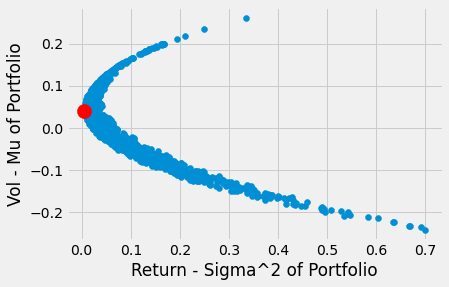

0.040186736235067966==0.040186736235067994


In [35]:
N = 1_000
w_all = np.random.rand(4,N)
w_all[3,:] = 1 - w_all[0,:] - w_all[1,:] - w_all[2,:]

# global mini solution
w_min = 1/A*np.linalg.inv(Sigma).dot(One)
sigma_min = 1/A

plt.scatter(np.diagonal(cal_sigma_p(w_all)), cal_mu_p(w_all))
plt.scatter((cal_sigma_p(w_min)),cal_mu_p(w_min),color='red', marker='o',s=200)
plt.xlabel('Return - Sigma^2 of Portfolio')
plt.ylabel('Vol - Mu of Portfolio')
plt.show()

print(f'{B/A}=={cal_mu_p(w_min)}')
# testify m = B/A is the mini return

## Tangency - CML
### Tangency Portfolio given return $m$

Now, there is a constraint that allow as invest in only the risk free assets and the portfolio on the frontier.

$$min_{w} \frac{1}{2}w^T \Sigma w$$

$$s.t.\quad  r_f + w^T (\mu - r_f \mathbb{1}) = m$$

Apply the Lagrangian Method,

$$L(x,\lambda) = \frac{1}{2}w^t\Sigma w + \lambda \bigg(m - r_f + w^T (\mu - r_f \mathbb{1})\bigg)$$

F.O.C.  w.r.t. w
$\frac{\partial L}{\partial w} = \Sigma w - \lambda(\mu - r_f \mathbb{1})$

$$w^*_f = \lambda \Sigma^{-1} (\mu - r_f \mathbb{1})$$


F.O.C. w.r.t. $\lambda$
$$r_f + w^T (\mu - r_f \mathbb{1}) = m$$
, substitute $w^*$ into the above function we could solve for $\lambda^*$

$$\lambda^* = \frac{m-r}{\big( \mu - r_f \mathbb{1} \big)^T \Sigma^{-1}\big( \mu - r_f \mathbb{1} \big) }$$

So,

$$w^*_f = \frac{(m-r)\Sigma^{-1}(\mu - r_f \mathbb{1})}{\big( \mu - r_f \mathbb{1} \big)^T \Sigma^{-1}\big( \mu - r_f \mathbb{1} \big) }$$

### Find the risk-free considering level Return, $m^*$
Haven Know $w_f^*$, we now add one more constraint to restrict $w_f^*$,

$$\mathbb{1}^T \cdot w_f^* = 1$$


$$(m-r)\frac{\mathbb{1}\Sigma^{-1}(\mu - r_f \mathbb{1})}{\big( \mu - r_f \mathbb{1} \big)^T \Sigma^{-1}\big( \mu - r_f \mathbb{1} \big) } = 1$$

$$  (m-r)\frac{B - r_f A}{C-2r_f B+r_f^2A}=1$$

$$m(B-r_f A) = C- r_fB$$

$$m^* = \frac{C- r_fB}{B-r_fA }$$

### Plug $m^*$ into `cal_w_star(m^*)`


1


In [45]:
# w^*_f

rf = 0.025

def cal_w_rf(m):
    w = (m - rf) * np.dot(np.linalg.inv(Sigma), (mu - rf * One)) / \
        (  np.dot(np.dot((mu - rf * One).T,np.linalg.inv(Sigma)), mu - rf * One)  )
    return w

print(cal_w_rf(m))

# m^*
m_star = (C-B*rf)/(B-A*rf)
w_fstar = cal_w_star(m_star)
cml_var = cal_sigma_p(w_fstar)
cml_mu = cal_mu_p(w_fstar)
# slope = (cml_var-0)/(cml_mu - rf)
# def cml(x):
#     y = x*slope + r
#     return y
# x = np.linspace(0,0.5,100)
# y_cml = cml(x)

[0.88735248 0.08126325 0.15484343 0.12164862]


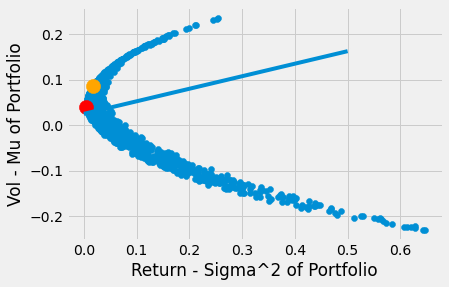

0.040186736235067966==0.040186736235067994


In [51]:
N = 1_000
w_all = np.random.rand(4,N)
w_all[3,:] = 1 - w_all[0,:] - w_all[1,:] - w_all[2,:]

# global mini solution
w_min = 1/A*np.linalg.inv(Sigma).dot(One)
sigma_min = 1/A

plt.scatter(np.diagonal(cal_sigma_p(w_all)), cal_mu_p(w_all))
plt.scatter((cal_sigma_p(w_min)),cal_mu_p(w_min),color='red', marker='o',s=200)
# here is the w^*_f
plt.scatter(cml_var,cml_mu,color='orange', marker='o',s=200)

plt.xlabel('Return - Sigma^2 of Portfolio')
plt.ylabel('Vol - Mu of Portfolio')
plt.show()

print(f'{B/A}=={cal_mu_p(w_min)}')
# testify m = B/A is the mini return

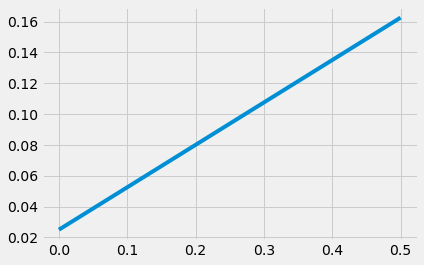

# Black-Litterman

## Part 1. Prior

In [11]:
Sigma = np.array( [[0.0049, 0.00672, 0.0105, 0.0168], \
                   [0.00672, 0.0144, 0.0252, 0.036],\
                   [0.0105, 0.0252, 0.09, 0.144],
                   [0.0168, 0.036, 0.144, 0.36] ] )
wm = np.array([0.05, 0.4, 0.45, 0.1])
Sm = 0.5

In [12]:
sigma = np.sqrt( wm.T.dot(Sigma).dot(wm) )
lam = 1/sigma*Sm
print('lambda:', lam)

Pi = lam * Sigma.dot(wm)
print('Pi:', Pi)

lambda: 2.236905855664812
Pi: [0.02088823 0.04705555 0.14652852 0.25957056]


In [13]:
T = 10*12 # 10 years 12 months
tau = 1/T

tSigma = tau * Sigma
print(tSigma)

[[4.08333333e-05 5.60000000e-05 8.75000000e-05 1.40000000e-04]
 [5.60000000e-05 1.20000000e-04 2.10000000e-04 3.00000000e-04]
 [8.75000000e-05 2.10000000e-04 7.50000000e-04 1.20000000e-03]
 [1.40000000e-04 3.00000000e-04 1.20000000e-03 3.00000000e-03]]


## Part 2. Part 2 - Conditional Dist

In [14]:
P = np.array(  [[-1,0, 1, 0],[0, 1, 0, 0]]  )
Q = np.array([0.1, 0.03])

In [15]:
# Omega = tau * P.dot(Sigma).dot(P.T)
# print(Omega)
print('-'*20)
Omega = np.diag(np.diag( tau * P.dot(Sigma).dot(P.T) ))  # Keep the Diagonal only
print(Omega)

--------------------
[[0.00061583 0.        ]
 [0.         0.00012   ]]


## Posterior

The **Posterior Distribution** is,

$$P(E|I) \sim N\Bigg(\bigg[ (\tau \Sigma)^{-1} + P^T \Omega^{-1}P \bigg]^{-1}\bigg[ (\tau \Sigma)^{-1}\Pi + P^T \Omega^{-1}Q \bigg], \bigg[(\tau \Sigma)^{-1} + P^T \Omega^{-1}P \bigg]^{-1} \Bigg)$$

Thus, the result of Black-Litterman Formula is, (the excess return given analyst's view, I)

$$\hat{R}_I:= E(r-r_f|I) = \bigg[ (\tau \Sigma)^{-1} + P^T \Omega^{-1}P \bigg]^{-1}\bigg[ (\tau \Sigma)^{-1}\Pi + P^T \Omega^{-1}Q \bigg]$$

In [16]:
denominator = np.linalg.inv(np.linalg.inv(tau*Sigma) + P.T.dot(np.linalg.inv(Omega)).dot(P))
numerator = np.linalg.inv(tau*Sigma).dot(Pi) + P.T.dot(np.linalg.inv(Omega)).dot(Q)
Rhat = np.dot(denominator, numerator)
Rhat

array([0.01676936, 0.03752887, 0.12475848, 0.22699715])

In [17]:
varhat = denominator
varhat

array([[2.76649723e-05, 2.72704536e-05, 3.34997646e-05, 6.17807594e-05],
       [2.72704536e-05, 5.47662974e-05, 6.91287461e-05, 9.10358830e-05],
       [3.34997646e-05, 6.91287461e-05, 3.20392153e-04, 5.33366068e-04],
       [6.17807594e-05, 9.10358830e-05, 5.33366068e-04, 1.96069647e-03]])

## Asset Allocation - $w^*$

In [18]:
def w_star(lam = lam):
    wstar = 1 / lam * np.linalg.inv(Sigma).dot(Rhat)
    return wstar

w_star()

array([0.09832891, 0.16626739, 0.40167109, 0.1       ])

In [19]:
print("if lambda = 0.1, then w_star = ",w_star(0.1))
print("if lambda = 1, then w_star = ",w_star(1))
print(f"if lambda = {lam}, then w_star = ",w_star(lam))
print("if lambda = 6, then w_star = ",w_star(6))

if lambda = 0.1, then w_star =  [2.19952517 3.71924492 8.98500411 2.23690586]
if lambda = 1, then w_star =  [0.21995252 0.37192449 0.89850041 0.22369059]
if lambda = 2.236905855664812, then w_star =  [0.09832891 0.16626739 0.40167109 0.1       ]
if lambda = 6, then w_star =  [0.03665875 0.06198742 0.14975007 0.03728176]
